# Logistic Regression

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Reading the Data set

dataset = pd.read_csv('wdbc.csv')

In [4]:
# Dataset head

dataset.head()



,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
# Load dataset
df = pd.read_csv("wdbc.csv", header=None)

# Assign column names
df.columns = [
    'ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df.to_csv("wdbc_named.csv", index=False)
print("✅ File saved with correct headings!")


✅ File saved with correct headings!


In [6]:
dataset = pd.read_csv('wdbc_named.csv')

In [7]:
dataset.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
dataset.columns


Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
dataset['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
dataset['Diagnosis'] = np.where(dataset['Diagnosis'].str.contains('B'),0,1)

In [11]:
dataset['Diagnosis'].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
## Intializing Dependent and Inndependent variable s

X = dataset.drop('Diagnosis', axis=1)
Y = dataset['Diagnosis']

In [14]:
X.head()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [16]:
dataset.shape


(569, 32)

In [17]:
# Train Test Split

from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [19]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 31), (171, 31), (398,), (171,))

In [20]:
X_train.corr()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
ID,1.000000,0.126439,0.134494,0.123216,0.147107,0.000275,0.000167,0.067386,0.075078,-0.032707,...,0.137503,0.089309,0.132177,0.162691,-0.002422,-0.016330,0.015923,0.058552,-0.070607,-0.085451
radius_mean,0.126439,1.000000,0.315636,0.997949,0.986597,0.175938,0.513142,0.715948,0.829759,0.104170,...,0.967989,0.267329,0.963425,0.940273,0.088594,0.410750,0.548636,0.743878,0.114921,-0.017638
texture_mean,0.134494,0.315636,1.000000,0.321052,0.316550,-0.056204,0.224764,0.319156,0.290910,0.045967,...,0.349944,0.906639,0.355432,0.346130,0.040270,0.267929,0.313498,0.297762,0.080413,0.119548
perimeter_mean,0.123216,0.997949,0.321052,1.000000,0.986019,0.209074,0.562665,0.753562,0.856555,0.136902,...,0.967383,0.272779,0.968224,0.940635,0.117095,0.452009,0.584016,0.769772,0.136690,0.026609
area_mean,0.147107,0.986597,0.316550,0.986019,1.000000,0.182229,0.504558,0.722062,0.829707,0.107898,...,0.959385,0.262421,0.955714,0.957326,0.094253,0.384595,0.527211,0.717552,0.091171,-0.023670
smoothness_mean,0.000275,0.175938,-0.056204,0.209074,0.182229,1.000000,0.619444,0.496700,0.542649,0.532322,...,0.202887,-0.016141,0.225313,0.196760,0.782716,0.426012,0.395832,0.479864,0.356738,0.461770
compactness_mean,0.000167,0.513142,0.224764,0.562665,0.504558,0.619444,1.000000,0.891681,0.828876,0.548593,...,0.535836,0.212490,0.592505,0.512680,0.516761,0.853119,0.812545,0.812627,0.456720,0.675176
concavity_mean,0.067386,0.715948,0.319156,0.753562,0.722062,0.496700,0.891681,1.000000,0.934187,0.427642,...,0.715295,0.290838,0.757189,0.702535,0.407852,0.751056,0.870369,0.870146,0.335329,0.481451
concave_points_mean,0.075078,0.829759,0.290910,0.856555,0.829707,0.542649,0.828876,0.934187,1.000000,0.407445,...,0.828644,0.263597,0.853477,0.809220,0.413125,0.652097,0.747365,0.903046,0.310167,0.339874
symmetry_mean,-0.032707,0.104170,0.045967,0.136902,0.107898,0.532322,0.548593,0.427642,0.407445,1.000000,...,0.139360,0.034381,0.172577,0.133384,0.386834,0.405376,0.353401,0.362867,0.657302,0.378664


<Axes: >

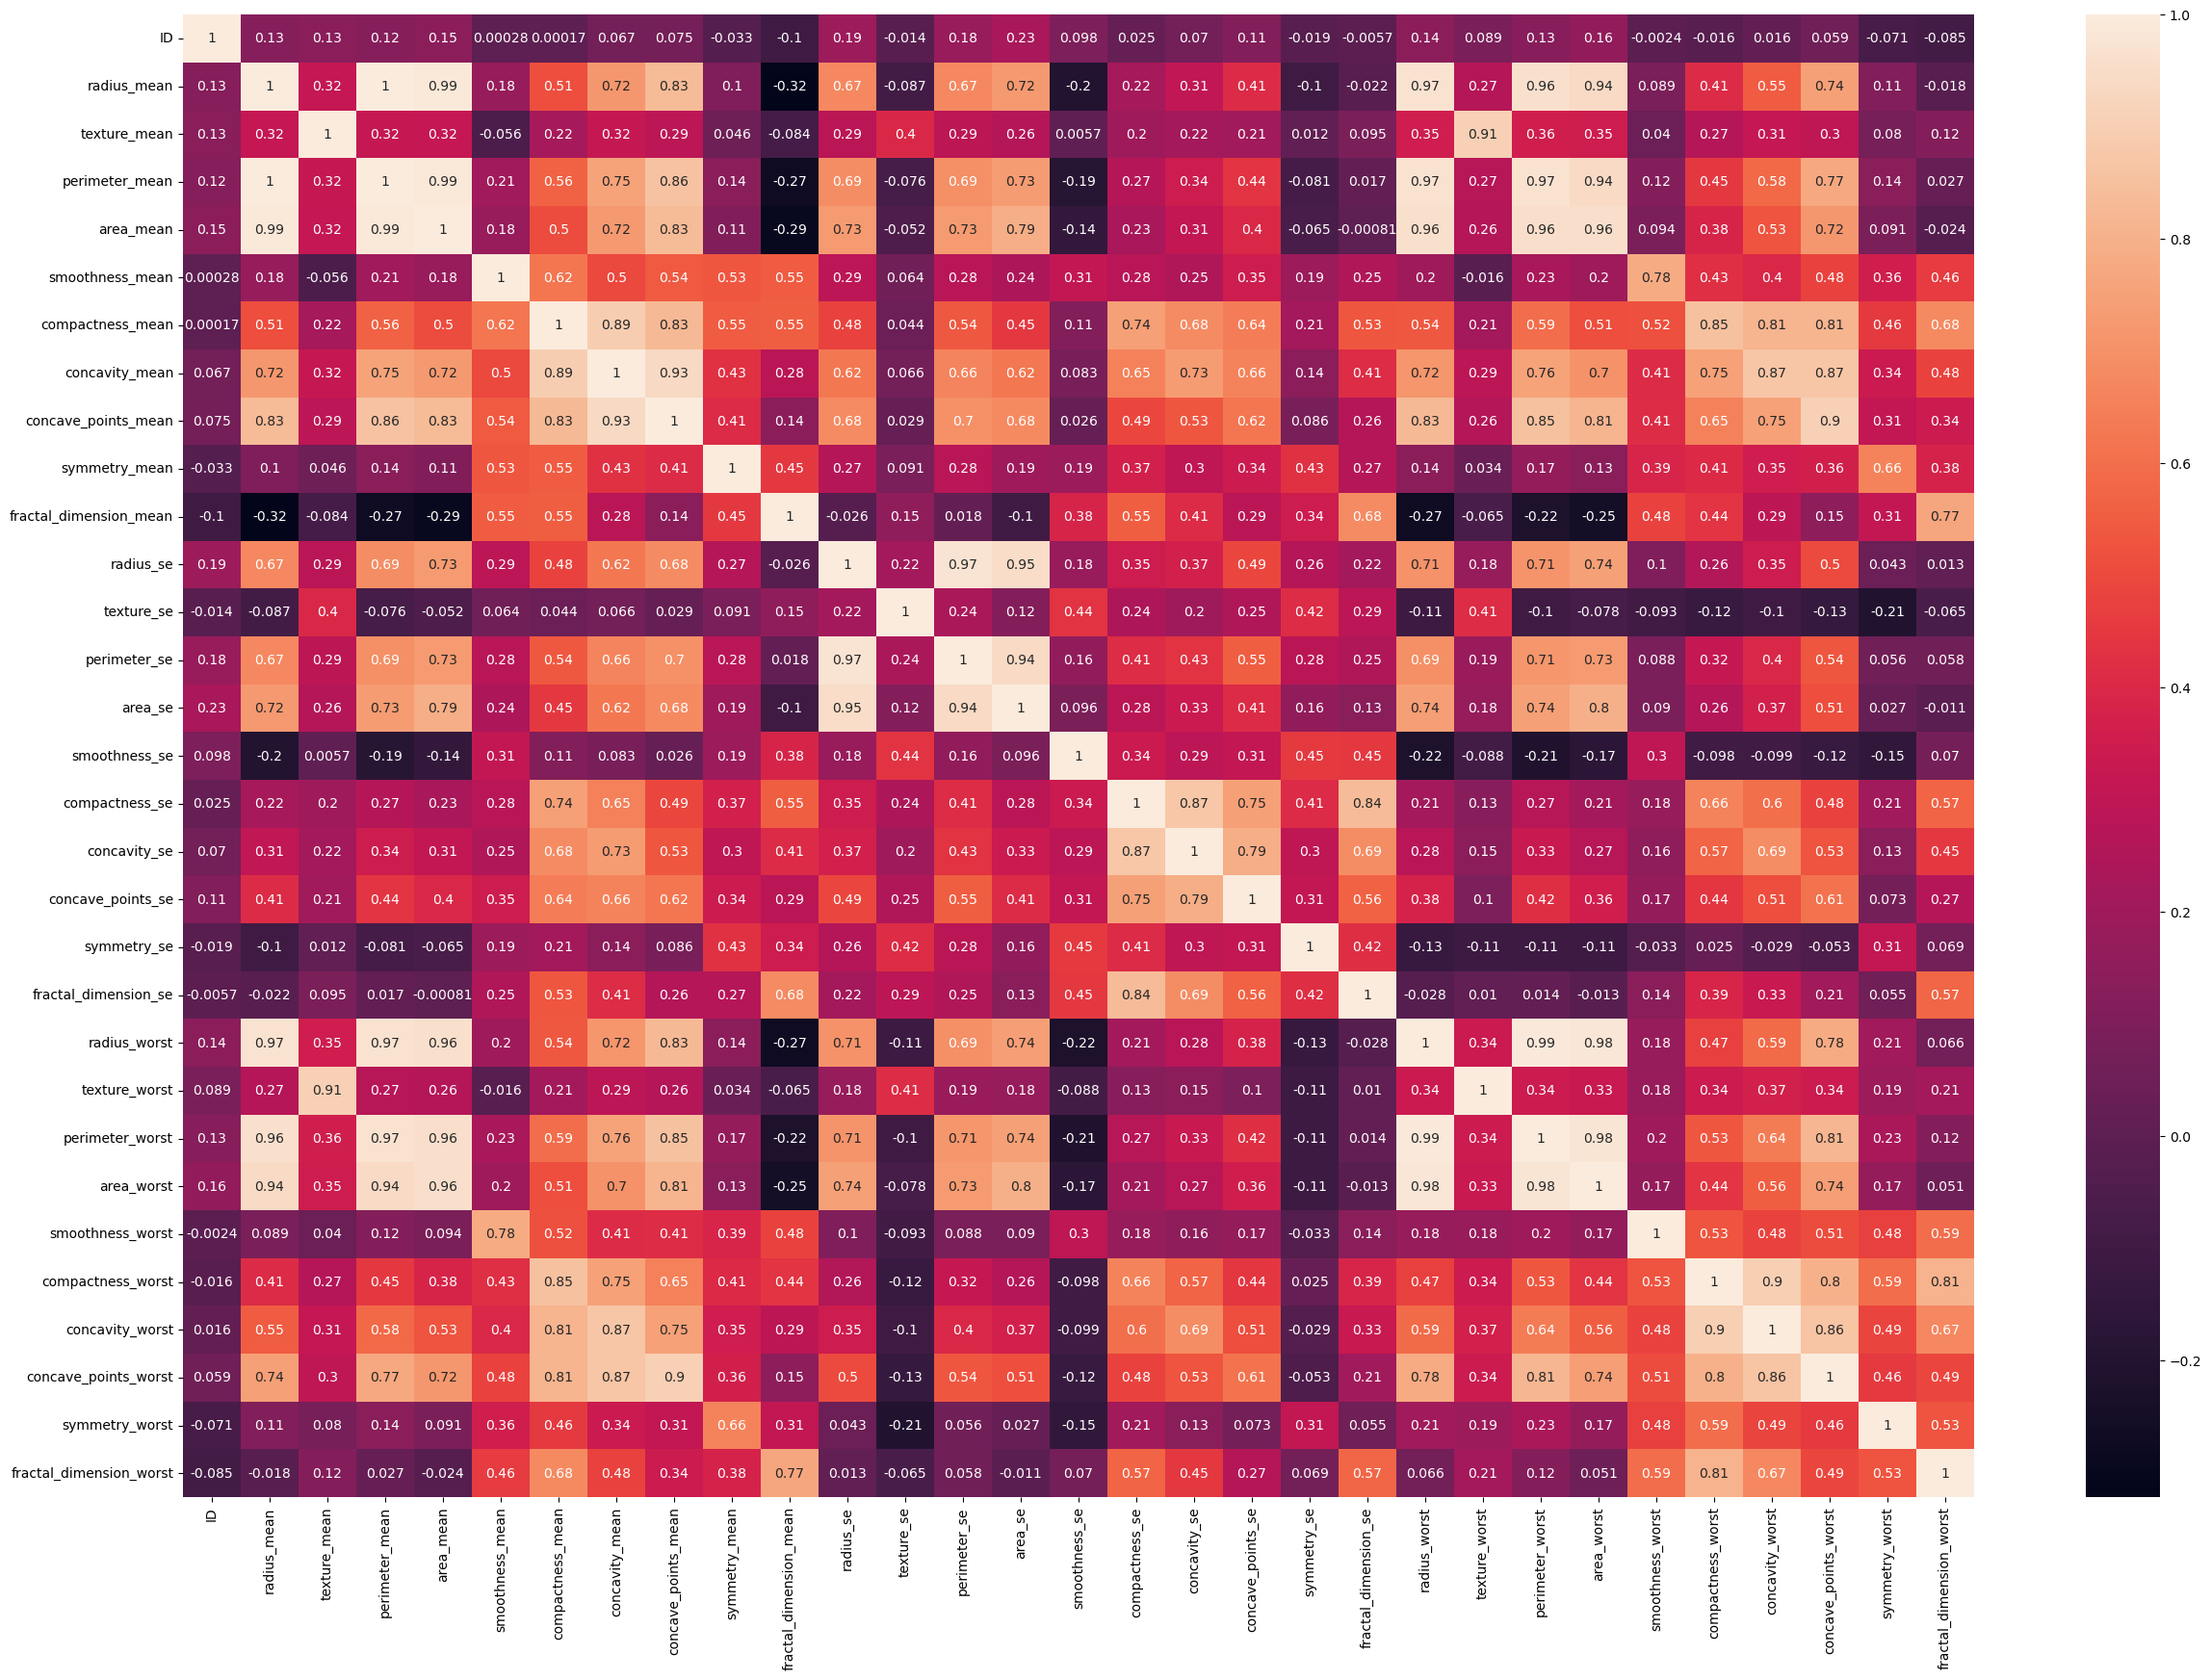

In [21]:
# Check for multicollinearity
plt.figure(figsize=(30,20))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [22]:
## The Threeshold is Calculated With this function 
def correlation(dataset,threeshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threeshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [23]:
corr_features = correlation(X_train,0.85)

In [24]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave_points_mean',
 'concave_points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [25]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [26]:
X_train.shape, X_test.shape

((398, 17), (171, 17))

In [27]:
## FEature Scalling and Standardization

from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled

array([[-0.24019721, -0.52062492, -0.3629934 , ...,  0.55828933,
        -0.58109609,  0.51919339],
       [-0.24627437,  1.48227672,  0.92918279, ..., -0.36036971,
        -0.54646457, -0.45710183],
       [-0.24030399, -0.33854295, -1.26027307, ..., -1.44521832,
        -1.35857381, -1.0249867 ],
       ...,
       [ 0.43549733, -0.53743249, -1.6271296 , ..., -0.17109825,
         0.37819713, -0.46265844],
       [-0.24630226, -0.11444207, -0.47281669, ..., -0.79430915,
        -0.91355872, -0.69047918],
       [ 0.41454618,  1.81282552,  2.77748544, ...,  0.33208686,
        -0.04084432, -0.11481506]], shape=(398, 17))

In [29]:
X_test_scaled

array([[-0.24629777,  0.33656096, -1.7159229 , ...,  0.93221588,
         0.56174421,  0.9309377 ],
       [-0.2400751 , -1.37977168,  0.63242623, ..., -1.04359351,
        -0.79061681, -0.57323484],
       [-0.1799528 , -0.15926225, -0.7391966 , ..., -1.03436076,
         0.74702286, -0.40209146],
       ...,
       [-0.24046683, -0.89039138, -1.05698315, ..., -0.5219429 ,
        -1.71354693, -0.61768767],
       [ 0.40975493, -0.17326855, -0.84901989, ..., -0.23572752,
        -0.62611707, -1.06388293],
       [-0.24018976, -0.38896565,  0.07162644, ..., -0.53117566,
         0.7297071 , -0.38319901]], shape=(171, 17))

Text(0.5, 1.0, 'X_train After Scalling')

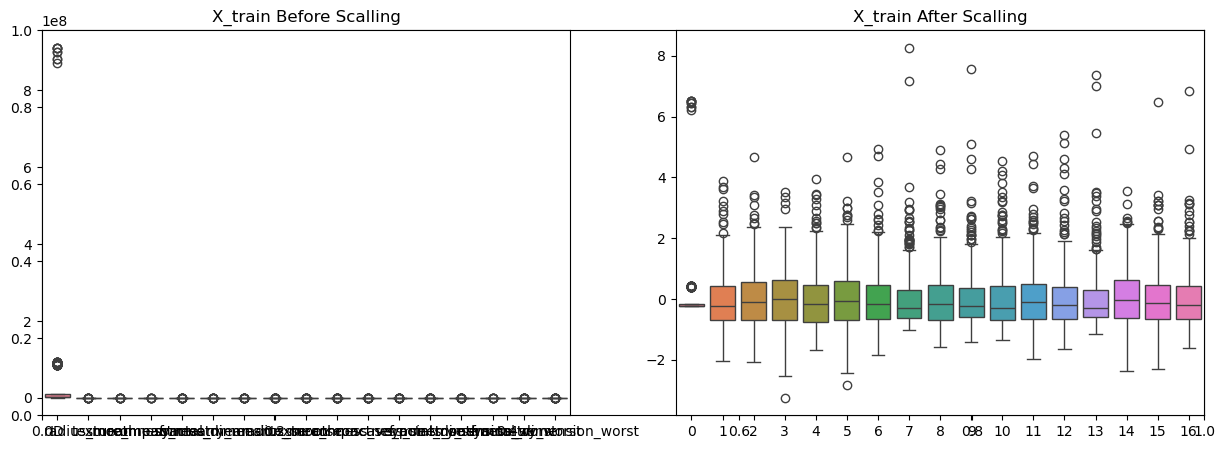

In [30]:
plt.subplots(figsize= (15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scalling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scalling')

In [31]:
## Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, Y_train)
y_pred = logistic.predict(X_test_scaled)
score = accuracy_score(Y_test, y_pred)
print(score)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(classification_report(Y_test, y_pred))

0.9649122807017544
[[109   3]
 [  3  56]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       112
           1       0.95      0.95      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [33]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(logistic,open("logistic.pkl", "wb"))

In [34]:
X_train.columns

Index(['ID', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
X_train.head()

,ID,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
431,907915,12.40,17.68,0.10540,0.13160,0.1811,0.07102,0.1767,1.4600,0.010000,0.032950,0.011670,0.02187,0.006005,0.1450,0.2556,0.09359
389,90312,19.55,23.21,0.10100,0.13180,0.1989,0.05884,0.6107,2.8360,0.011240,0.040970,0.034410,0.02768,0.006240,0.1251,0.2576,0.07602
309,893548,13.05,13.84,0.08352,0.03735,0.1453,0.05518,0.3975,0.8285,0.004148,0.004711,0.004821,0.01422,0.002273,0.1016,0.2107,0.06580
111,86408,12.63,20.76,0.09933,0.12090,0.1735,0.07070,0.3424,1.8030,0.012910,0.040420,0.022950,0.02144,0.005891,0.1287,0.2226,0.08486
35,854253,16.74,21.59,0.09610,0.13360,0.1896,0.05656,0.4615,0.9197,0.005776,0.024990,0.011950,0.02789,0.002665,0.1563,0.4863,0.08633
